In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

allages = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/all-ages.csv')
gardstu = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/grad-students.csv')
major_list = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/majors-list.csv')
recgards = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/recent-grads.csv')
womenstem = pd.read_csv('/Users/apple/Documents/GitHub/YunlongWei_Homework/Lecture_4_majors/archive/women-stem.csv')

In [16]:
#Which major has the lowest unemployment rate
# Sort the data by the unemployment rate in ascending order
df_sorted = allages.sort_values(by='Unemployment_rate')

# Find the major with the lowest unemployment rate
lowest_unemployment_major = df_sorted.head(1)

# Print the result
print("Major with the lowest unemployment rate:")
print(lowest_unemployment_major[['Major', 'Unemployment_rate']])

Major with the lowest unemployment rate:
                                         Major  Unemployment_rate
26  EDUCATIONAL ADMINISTRATION AND SUPERVISION                0.0


In [17]:
#Which major has the highest percentage of women
# Calculate the proportion of women for each major
womenstem['Proportion_of_Women'] = womenstem['Women'] / womenstem['Total']

# Sort the data in descending order with respect to the proportion of women
df_sorted = womenstem.sort_values(by='Proportion_of_Women', ascending=False)

# Display only the top 3 majors
top_3_women_majors = df_sorted.head(3)[['Major', 'Total', 'Proportion_of_Women']]

# Print the result
print("Top 3 majors with the highest percentage of women:")
print(top_3_women_majors)

Top 3 majors with the highest percentage of women:
                                            Major   Total  Proportion_of_Women
74  COMMUNICATION DISORDERS SCIENCES AND SERVICES   38279             0.967998
40                     MEDICAL ASSISTING SERVICES   11123             0.927807
26                                        NURSING  209394             0.896019


#How do the distributions of median income compare across major categories
'''The median is often chosen over the mean 
because it is less affected by outliers or extreme values in the data set. 
The mean can be skewed by very high or very low incomes, 
while the median represents the middle value, 
providing a more robust measure of central tendency for skewed distributions.'''


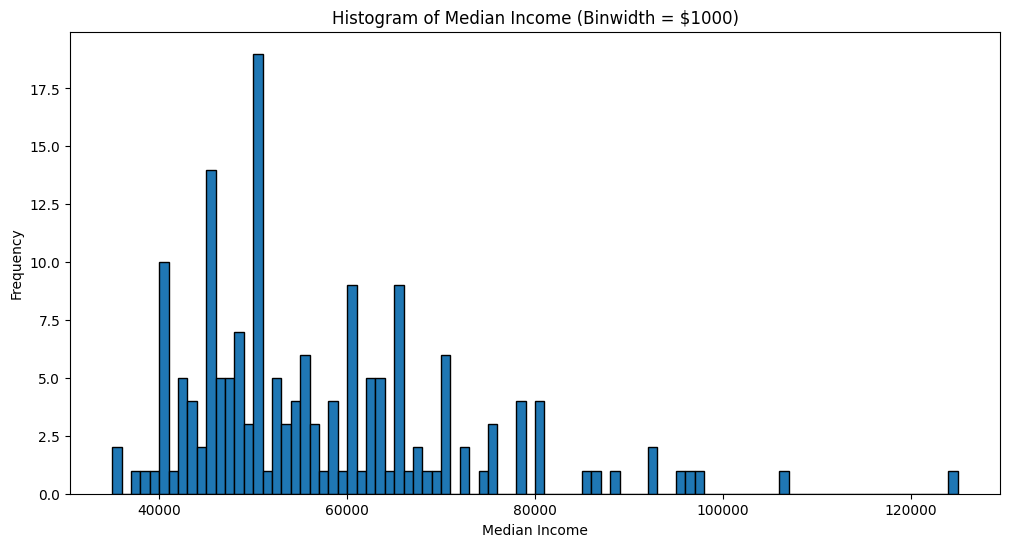

In [19]:
# Calculate bin edges
min_income = allages['Median'].min()
max_income = allages['Median'].max()
bin_edges = np.arange(min_income, max_income + 1000, 1000)  # Adjust the step size as needed

# Plot the histogram with specified bin edges
plt.figure(figsize=(12, 6))
plt.hist(allages['Median'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Median Income (Binwidth = $1000)')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

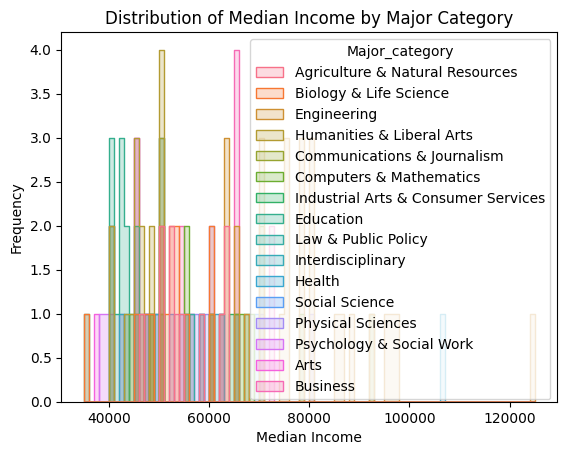

In [20]:
# Plot the distribution of median income by major category with a bin width of $1000
sns.histplot(data=allages, x='Median', hue='Major_category', binwidth=1000, element='step', stat='count', common_norm=False)
plt.title('Distribution of Median Income by Major Category')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

In [21]:
#All STEM fields aren't the same
stem_categories = [
    'Engineering', 'Computers & Mathematics', 'Biology & Life Science', 
    'Physical Sciences', 'Agriculture & Natural Resources'
]

allages['Is_STEM'] = allages['Major_category'].apply(lambda x: x in stem_categories)

overall_median_income = allages['Median'].median()

stem_majors_below_median = allages[(allages['Is_STEM']) & (allages['Median'] <= overall_median_income)]

result = stem_majors_below_median[['Major', 'Median', 'P25th', 'P75th']].sort_values(by='Median', ascending=False)

print(result)

                                  Major  Median  P25th    P75th
79                 BIOCHEMICAL SCIENCES   53000  33000  82000.0
98  COGNITIVE SCIENCE AND BIOPSYCHOLOGY   53000  31500  93000.0
7             MISCELLANEOUS AGRICULTURE   52000  35000  75000.0
8                 ENVIRONMENTAL SCIENCE   52000  38000  75000.0
10         NATURAL RESOURCES MANAGEMENT   52000  37100  75000.0
89                MISCELLANEOUS BIOLOGY   52000  33500  72800.0
78                              BIOLOGY   51000  35000  80000.0
5            PLANT SCIENCE AND AGRONOMY   50000  35000  75000.0
17           COMMUNICATION TECHNOLOGIES   50000  34500  75000.0
80                               BOTANY   50000  32000  75000.0
86                           PHYSIOLOGY   50000  30000  75000.0
0                   GENERAL AGRICULTURE   50000  34000  80000.0
83                             GENETICS   48000  33000  80000.0
82                              ECOLOGY   47500  32000  73000.0
3                       ANIMAL SCIENCES 

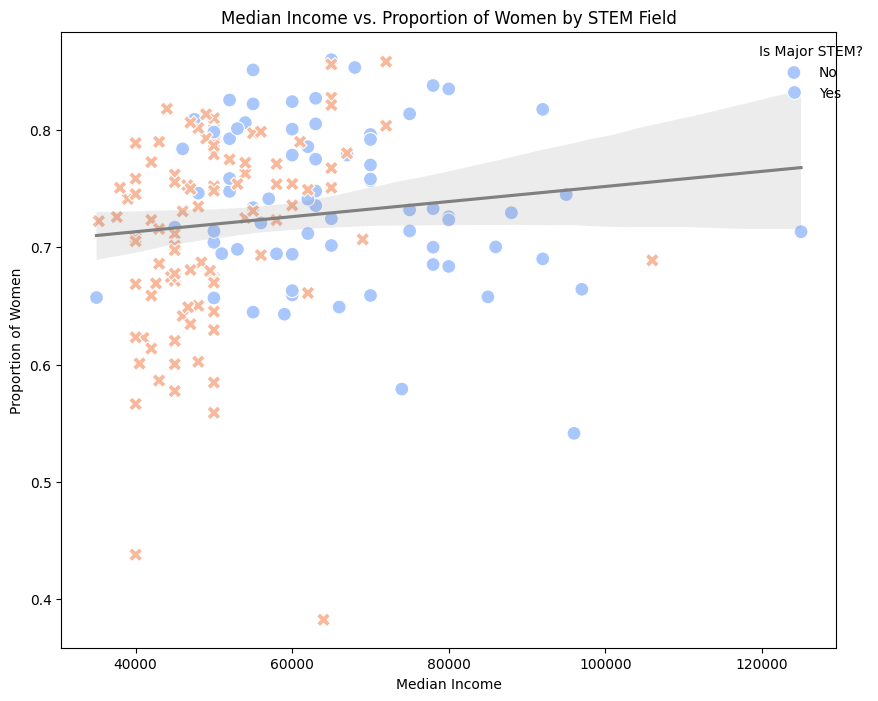

In [22]:
# Define STEM categories
stem_categories = [
    'Engineering', 'Computers & Mathematics', 'Biology & Life Science', 
    'Physical Sciences', 'Agriculture & Natural Resources'
]

# Create a new column to indicate if the major is STEM
allages['Is_STEM'] = allages['Major_category'].apply(lambda x: 'Yes' if x in stem_categories else 'No')

# Calculate the proportion of women for each major
allages['Proportion_of_Women'] = allages['Employed'] / allages['Total']

# Create a scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Median', y='Proportion_of_Women', hue='Is_STEM', style='Is_STEM', data=allages, palette='coolwarm', s=100)

# Add regression line if desired
sns.regplot(x='Median', y='Proportion_of_Women', scatter=False, data=allages, color='gray')

# Add titles and labels
plt.title('Median Income vs. Proportion of Women by STEM Field')
plt.xlabel('Median Income')
plt.ylabel('Proportion of Women')
plt.legend(title='Is Major STEM?', labels=['No', 'Yes'], loc='upper right', bbox_to_anchor=(1.05, 1), frameon=False)

# Show the plot
plt.show()

# Further exploration
'''How does the choice of college major affect 
both the unemployment rate and median income of graduates, 
and is there a correlation between these two economic outcomes?'''


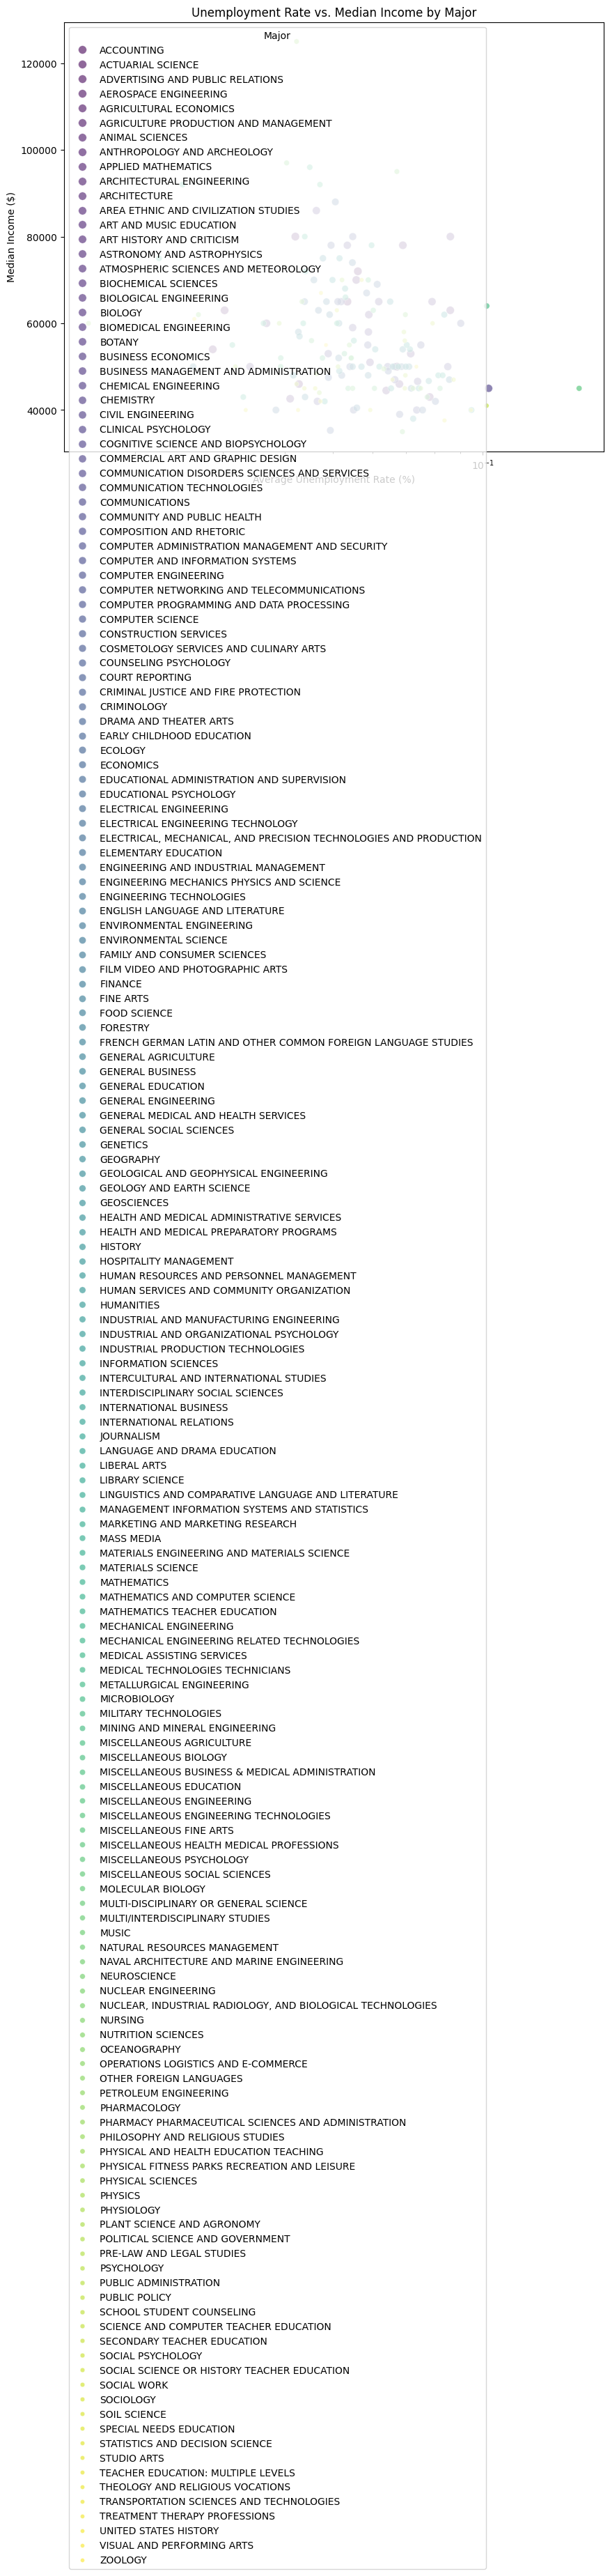

In [23]:
# Calculate average unemployment rate and median income for each major
major_summary = allages.groupby('Major').agg({
    'Unemployment_rate': 'mean',
    'Median': 'median'
}).reset_index()

# Scatter plot of median income vs. unemployment rate for each major
plt.figure(figsize=(10, 8))
sns.scatterplot(data=major_summary, x='Unemployment_rate', y='Median', hue='Major', size='Major', palette='viridis', alpha=0.6)
plt.title('Unemployment Rate vs. Median Income by Major')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Median Income ($)')
plt.xscale('log')  # Using a log scale for better visibility of data spread
plt.show()